### 2 LAYER PERCEPTRON (MNIST digits)

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas import DataFrame

#### getting dataset and setting X and y

<Figure size 432x288 with 0 Axes>

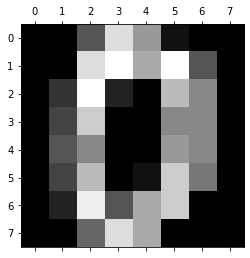

(1797, 64)


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

#Display the first digit
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

#X contains the values for each 64 pixels for each of 1797 images and y contains the correct corresponding digit
X = digits.data 
y = digits.target
 
#pixels in one 8x8 image is 64 and there are total of 1797 images
attr = X.shape[1]
n_samples = X.shape[0]
print(X.shape)

#### one hot encoding for output label

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse=False, categories='auto')
y = y.reshape(len(y), 1)
y = ohe.fit_transform(y)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


#### training-testing (80/20)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#always fir_transform on training set and as testing set is unseen, we'll use transform to normalise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### training our multilayer perceptron model

In [6]:
# #input neorons = 64, # hidden neurons = varying, #output neurons = 1


mlp_hn_n = {}
n = 20
for i in range(1, n+1):
    mlp_hn_n[i] = MLPClassifier(hidden_layer_sizes=(attr,i,3), max_iter=1000, random_state=0)
    mlp_hn_n[i].fit(X_train,y_train)

#### predicting y and geting accuracy score for our model

In [7]:
y_pred_hn_n = {}
acc_hn_n = {}
most_acc_model = -1 
for i in range(1, n+1):
    y_pred_hn_n[i] = mlp_hn_n[i].predict(X_test)
    acc_hn_n[i] = accuracy_score(y_test,y_pred_hn_n[i]).round(5)
    if acc_hn_n[i] > most_acc_model:
        most_acc_model = acc_hn_n[i]
        hn_n = i
        y_pred = y_pred_hn_n[i]
    print("accuracy of MLP with {} hidden neurons: {}".format(i, acc_hn_n[i]))
print("\nhighest accuracy achieved with {} hidden neurons: {}".format(hn_n, most_acc_model))


accuracy of MLP with 1 hidden neurons: 0.10833
accuracy of MLP with 2 hidden neurons: 0.64722
accuracy of MLP with 3 hidden neurons: 0.56944
accuracy of MLP with 4 hidden neurons: 0.23333
accuracy of MLP with 5 hidden neurons: 0.775
accuracy of MLP with 6 hidden neurons: 0.76944
accuracy of MLP with 7 hidden neurons: 0.81389
accuracy of MLP with 8 hidden neurons: 0.79444
accuracy of MLP with 9 hidden neurons: 0.79722
accuracy of MLP with 10 hidden neurons: 0.79167
accuracy of MLP with 11 hidden neurons: 0.80278
accuracy of MLP with 12 hidden neurons: 0.76111
accuracy of MLP with 13 hidden neurons: 0.78889
accuracy of MLP with 14 hidden neurons: 0.77778
accuracy of MLP with 15 hidden neurons: 0.58611
accuracy of MLP with 16 hidden neurons: 0.77778
accuracy of MLP with 17 hidden neurons: 0.78056
accuracy of MLP with 18 hidden neurons: 0.79722
accuracy of MLP with 19 hidden neurons: 0.81944
accuracy of MLP with 20 hidden neurons: 0.55556

highest accuracy achieved with 19 hidden neurons: 

#### f1 score and ROC curve for most accurate model

In [8]:
from sklearn.metrics import f1_score

f1_most_acc = f1_score(y_test, y_pred, average='weighted').round(5)
print("\nf1 score for the most accurate model: {}".format(f1_most_acc))


f1 score for the most accurate model: 0.89286


#### confusion matrix for the most accurate model

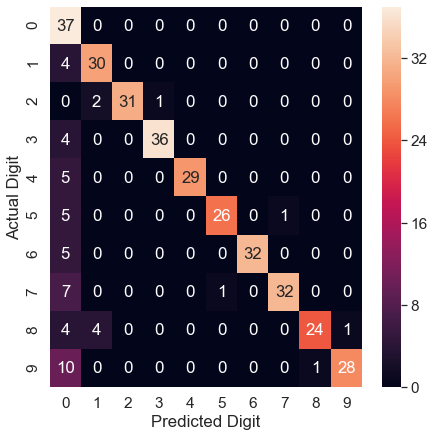

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm
plt.figure(figsize = (7, 7))
sn.set(font_scale=1.4) # for label size
cm_hm = sn.heatmap(cm, annot=True)
bottom, top = cm_hm.get_ylim()
cm_hm.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.show()